##  List of imports & functions used

In [1]:
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt
from matplotlib import patches
from PIL import Image
from IPython.display import clear_output
from pathlib import Path

In [2]:
# Adding Function Attached To Mouse Callback
def drawLine(event,x,y,flags,params):
    global ixLineAdd,iyLineAdd,ixLineRemove, iyLineRemove, ix, iy, drawing, color, whichClick, imageHeight, imageWidth, lineAdd, lineRemove
    # Left Mouse Button Down Pressed
    if(event==1):
        drawing = True
        color = 255
        whichClick = 1
        ix = x
        iy = y
    # Right mouse button Down Pressed
    if(event==2):
        drawing = True
        color = 0
        whichClick = 2
        ix = x
        iy = y

    if(event==0):
        if(drawing==True):
            #For Drawing Line
            cv2.line(imgTmp,pt1=(ix,iy),pt2=(x,y),color=(color,color,color),thickness=3)
            ix = x
            iy = y
            if(whichClick == 1):
                for i in range(0, 5):
                    if(((ix+i) < imageWidth) and ((ix-i) >= 0)):
                        #print(ix+i,i)
                        ixLineAdd.append(ix+i)
                    if(((iy+i) < imageHeight) and ((iy-i) >= 0)):    
                        iyLineAdd.append(iy+i)
                    if(((ix-i) >= 0) and ((ix+i) < imageWidth)):
                        ixLineAdd.append(ix-i)
                    if(((iy-i) >= 0) and ((iy+i) < imageHeight)):
                        iyLineAdd.append(iy-i)
            elif(whichClick==2):
                for i in range(0, 5):
                    if(((ix+i) < imageWidth) and ((ix-i) >= 0)):
                        #print(ix+i,i)
                        ixLineRemove.append(ix+i)
                    if(((iy+i) < imageHeight) and ( (iy-i) >= 0)):
                        iyLineRemove.append(iy+i)
                    if(((ix-i) >= 0) and ((ix+i) < imageWidth)):
                        ixLineRemove.append(ix-i)
                    if(((iy-i) >= 0) and ((iy+i) < imageHeight)):
                        iyLineRemove.append(iy-i)
                    #print(ixLineRemove,i)
                
    # Mouse button released
    if(event==4 or event==5):
        drawing = False
        if(len(iyLineAdd)>0 and len(ixLineAdd)>0):
            n = min(len(iyLineAdd), len(ixLineAdd))
            lineAdd = np.vstack((iyLineAdd[:n], ixLineAdd[:n])).T
            #iyLineAdd = np.unique(iyLineAdd, axis=0)
            #ixLineAdd = np.unique(ixLineAdd, axis=0)
        if(len(iyLineRemove)>0 and len(ixLineRemove)>0):
            n = min(len(iyLineRemove), len(ixLineRemove))
            lineRemove = np.vstack((iyLineRemove[:n], ixLineRemove[:n])).T
            #iyLineRemove = np.unique(iyLineRemove, axis=0)
            #ixLineRemove = np.unique(ixLineRemove, axis=0)
        
def drawRect(event,x,y,flags,params):
    global ix,iy,ix2,iy2,drawing
    # Left Mouse Button Down Pressed
    if(event==1):
        drawing = True
        ix = x
        iy = y
    # Mouse button released
    if(event==4):
        drawing = False
        cv2.rectangle(imgTmp,pt1=(ix,iy),pt2=(x,y),color=(255,255,255),thickness=3)
        ix2=x
        iy2=y

# Start of the algorithm of the background removal algorithm

## Upload the image

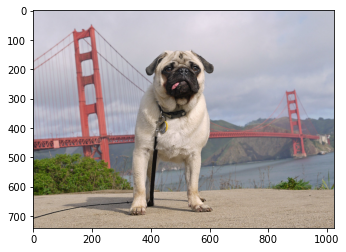

In [3]:
# Setup image and mask

#Insert your file name and extension here
fileName = 'doggo1.jpg'
img = cv2.imread('images/'+fileName)[:,:,::-1]
mask = np.zeros(img.shape[:2],np.uint8)

# GrabCut parameters
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
imageHeight = img.shape[:2][0]
imageWidth = img.shape[:2][1]

#Show image
figure, ax = plt.subplots(1)
ax.imshow(img)

## Select a rectangle for the foreground, press 'q' when finished!

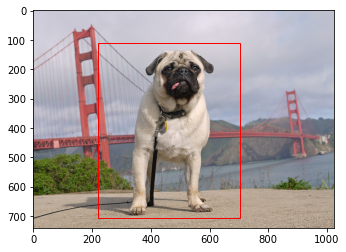

In [4]:
drawing = False
ix, iy, ix2, iy2 = -1, -1, -1, -1
imgTmp = img.copy()
originalImage = img.copy()
# Making Window For The Image
cv2.namedWindow("Select the foreground with a rectangle")

# Adding Mouse CallBack Event
cv2.setMouseCallback("Select the foreground with a rectangle",drawRect)

# Starting The Loop So Image Can Be Shown and allow exit on "Q" key pressed
while(True):
    cv2.imshow("Select the foreground with a rectangle",imgTmp)
    if cv2.waitKey(20) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()
figure, ax = plt.subplots(1)

# Rectangle info for foreground, conditions so the rectangle works in every way
if(ix2 <ix):
    ix2, ix = ix, ix2
if(iy2<iy):
    iy2, iy = iy, iy2
# Save the rectangle's information
width = abs(ix2-ix)
height = abs(iy2-iy)
xStart = ix
yStart = iy

# Show rectangle including foreground item on image
rect = patches.Rectangle((ix ,iy),width ,height , edgecolor='r', facecolor="none")
ax.imshow(img)
ax.add_patch(rect)
rect = (xStart,yStart,width,height)

## First pass of the GrabCut Algorithm

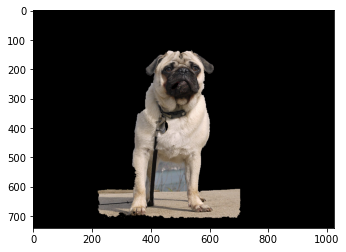

In [5]:
# Grabcut algorithm with rectangle for foreground item
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

# Show current image only with rectangle
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img)

## Loop with user interaction until satisfied
### Press 'q' to close the window!

Final result: 


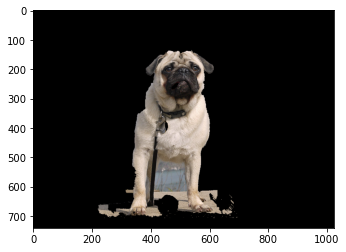

In [6]:
# Loop for the algorithm
counter = 0
while(True):
    
    # Variables used
    drawing = False
    ixLineAdd, iyLineAdd,ixLineRemove, iyLineRemove, ix, iy, whichClick = [], [],[], [], 0, 0, 0
    lineAdd = []
    lineRemove = []
    imgTmp = img.copy()
    color = 50
    
    # After the first iteration, replace the mask since it was converted from [0:3] to [0:1]
    if counter > 0:
        mask = maskTmp.copy()
        
    # Making Window For The Image
    cv2.namedWindow("Right click to remove and left click to add")
    # Adding Mouse CallBack Event
    cv2.setMouseCallback("Right click to remove and left click to add",drawLine)

    # Starting The Loop So Image Can Be Shown
    while(True):
        cv2.imshow("Right click to remove and left click to add",imgTmp)
        if cv2.waitKey(20) & 0xFF == ord('q'):
            break
    cv2.destroyAllWindows()
    figure, ax = plt.subplots(1)
    
    # Edit the mask for the algorithm based on the user's inputs
    if len(lineAdd)>0:
        mask[lineAdd[:,0],lineAdd[:,1]] = 1
    if len(lineRemove)>0:
        mask[lineRemove[:,0],lineRemove[:,1]] = 0
        
    #Grabcut algorithm with template mask, save the mask before the grabcut changes it
    maskTmp = mask.copy()
    mask, bgdModel, fgdModel = cv2.grabCut(img,mask,None,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_MASK)
    mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    img = originalImage*mask[:,:,np.newaxis]
    counter = counter + 1
    
    # Show final result and ask to continue the algorithm or not
    print("Final result: ")
    plt.imshow(img),plt.show()
    if input('Would you like to continue editing?\n') != 'y':
        break
    clear_output(wait=True)

## Save & remove background

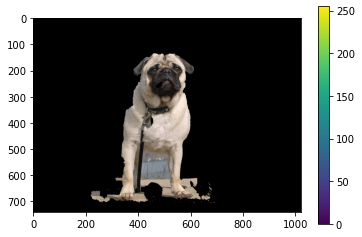

In [7]:
plt.imshow(img),plt.colorbar(),plt.show()
im = Image.fromarray(img)
path = Path('results/'+fileName.rsplit(".",1)[0]+'.png')
im.save(path)

# Transfer black as transparent and save new image
img = Image.open(path)
img = img.convert("RGBA")
datas = img.getdata()
mask_1D = mask.flatten() 
index = 0
newData = []
for item in datas:
    if item[0] == 0 and item[1] == 0 and item[2] == 0 and mask_1D[index] == 0:
        newData.append((255, 255, 255, 0))
    else:
        newData.append(item)
    index = index + 1

img.putdata(newData)
img.save(path)

### Reference
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_grabcut/py_grabcut.html